In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import _tree

In [2]:
data = pd.read_csv('titanic.csv')  
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
data = data[['Pclass','Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Survived']]
data.dropna(inplace=True) 

In [4]:
data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
performance_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [6]:
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    performance_results['Model'].append(model_name)
    performance_results['Accuracy'].append(accuracy)
    performance_results['Precision'].append(precision)
    performance_results['Recall'].append(recall)
    performance_results['F1-Score'].append(f1)

In [7]:
clf_categorical = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_categorical.fit(X_train, y_train)

y_pred_categorical = clf_categorical.predict(X_test)

accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print("Decision Tree Accuracy:", accuracy_categorical)

evaluate_model('Categorical Decision Tree', clf_categorical, X_test, y_test)

Decision Tree Accuracy: 0.8052434456928839


In [8]:
report_dt = classification_report(y_test, y_pred_categorical)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       166
           1       0.84      0.60      0.70       101

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



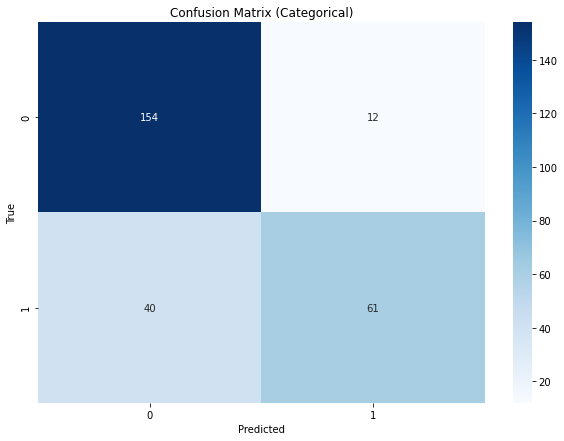

In [9]:
cm_categorical = confusion_matrix(y_test, y_pred_categorical)

plt.figure(figsize=(10,7))
sns.heatmap(cm_categorical, annot=True, fmt='d', cmap='Blues', xticklabels=clf_categorical.classes_, yticklabels=clf_categorical.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Categorical)')
plt.show()

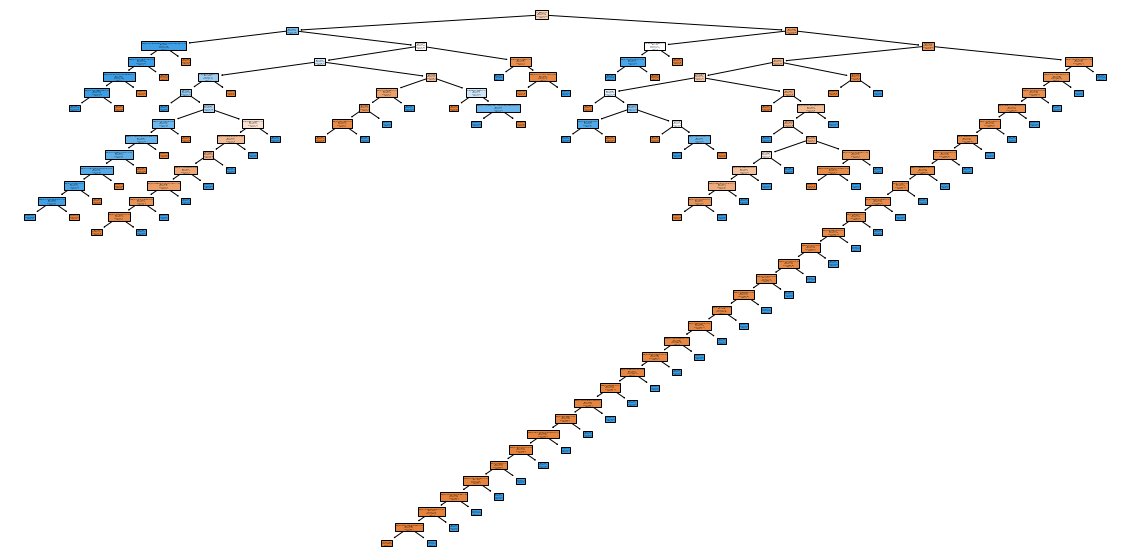

In [10]:
class_names = [str(cls) for cls in clf_categorical.classes_]

plt.figure(figsize=(20,10))
plot_tree(clf_categorical, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [11]:
def extract_gini_index(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    nodes = {
        "Node": range(tree_.node_count),
        "Feature": feature_name,
        "Gini": [tree_.impurity[i] for i in range(tree_.node_count)]
    }
    
    return pd.DataFrame(nodes)

In [12]:
gini_df_categorical = extract_gini_index(clf_categorical, X.columns)
print('Gini Index of each node (Categorical):')
print(gini_df_categorical)

Gini Index of each node (Categorical):
     Node                                            Feature      Gini
0       0                                           Sex_male  0.475229
1       1                                             Pclass  0.370652
2       2  Name_Mrs. William John Robert (Dorothy Ann Won...  0.060093
3       3                   Name_Miss. Helen Loraine Allison  0.045776
4       4          Name_Mrs. William (Anna Sylfven) Lahtinen  0.031000
..    ...                                                ...       ...
166   166                                         undefined!  0.000000
167   167                                         undefined!  0.000000
168   168                                         undefined!  0.000000
169   169                                         undefined!  0.000000
170   170                                         undefined!  0.000000

[171 rows x 3 columns]


# 1. Maximum Depth

In [13]:
clf_depth = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf_depth.fit(X_train, y_train)
y_pred_depth = clf_depth.predict(X_test)
print("Accuracy (max_depth=5):", accuracy_score(y_test, y_pred_depth))
evaluate_model('Max Depth = 5', clf_depth, X_test, y_test)

Accuracy (max_depth=5): 0.8052434456928839


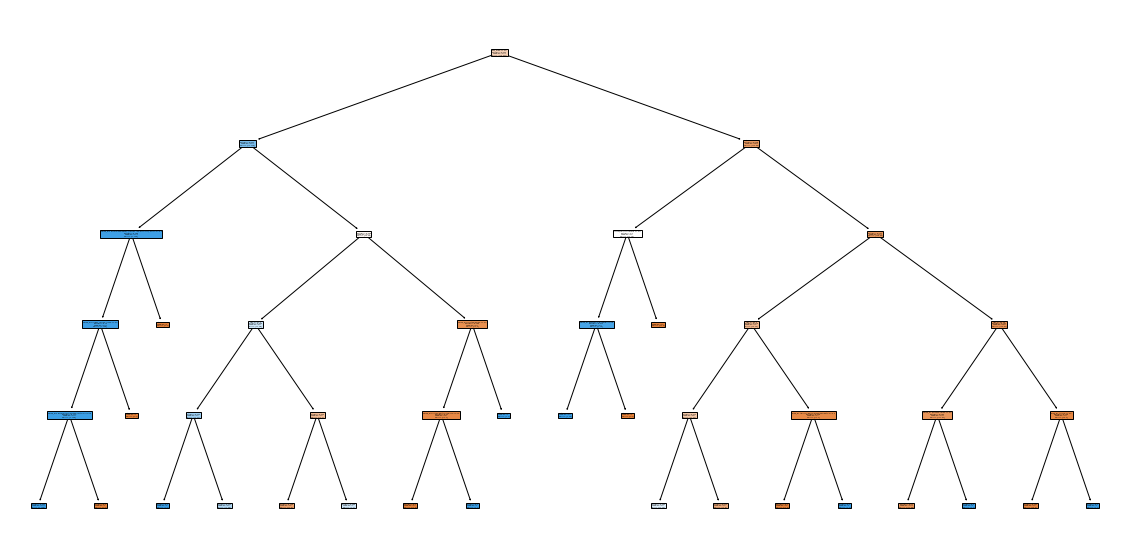

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf_depth, filled=True, feature_names=X.columns)
plt.show()

# 2. Minimum Samples per Leaf

In [15]:
clf_min_samples_leaf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, random_state=42)
clf_min_samples_leaf.fit(X_train, y_train)
y_pred_leaf = clf_min_samples_leaf.predict(X_test)
print("Accuracy (min_samples_leaf=10):", accuracy_score(y_test, y_pred_leaf))
evaluate_model('Min Samples Leaf = 10', clf_min_samples_leaf, X_test, y_test)

Accuracy (min_samples_leaf=10): 0.7902621722846442


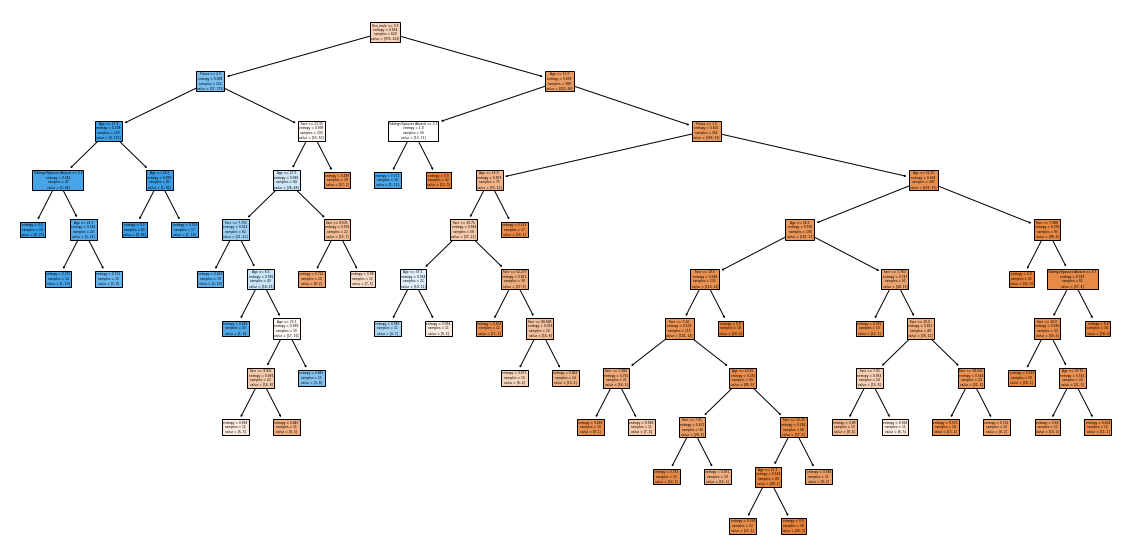

In [16]:
plt.figure(figsize=(20,10))
plot_tree(clf_min_samples_leaf, filled=True, feature_names=X.columns)
plt.show()

# 3. Minimum Samples per Split

In [17]:
clf_min_samples_split = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=42)
clf_min_samples_split.fit(X_train, y_train)
y_pred_split = clf_min_samples_split.predict(X_test)
print("Accuracy (min_samples_split=20):", accuracy_score(y_test, y_pred_split))
evaluate_model('Min Samples Split = 20', clf_min_samples_split, X_test, y_test)

Accuracy (min_samples_split=20): 0.7940074906367042


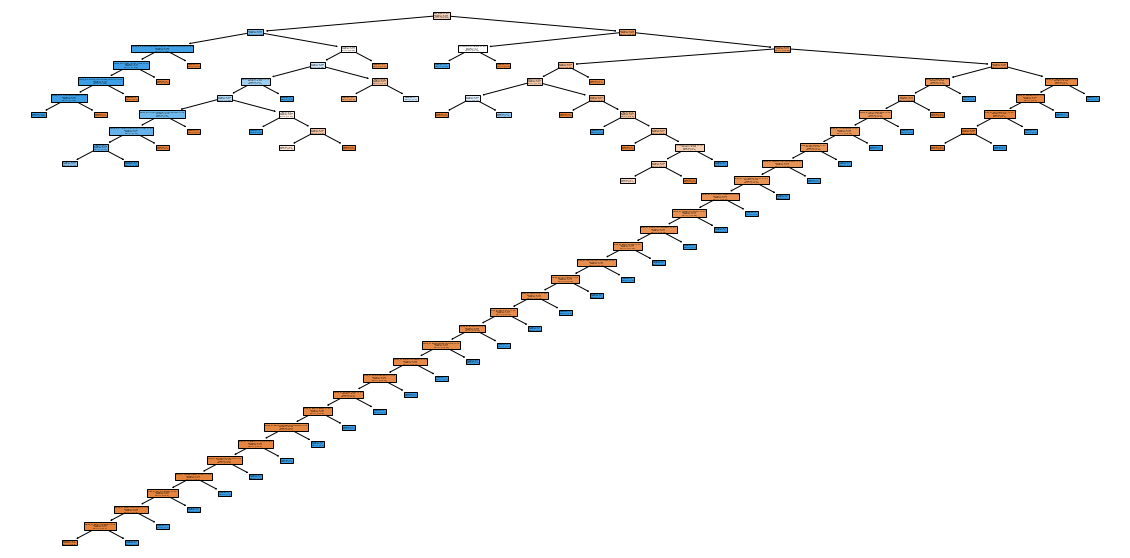

In [18]:
plt.figure(figsize=(20,10))
plot_tree(clf_min_samples_split, filled=True, feature_names=X.columns)
plt.show()

# 4. Maximum Leaf Nodes

In [19]:
clf_max_leaf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)
clf_max_leaf.fit(X_train, y_train)
y_pred_leaf_nodes = clf_max_leaf.predict(X_test)
print("Accuracy (max_leaf_nodes=10):", accuracy_score(y_test, y_pred_leaf_nodes))
evaluate_model('Max Leaf Nodes = 10', clf_max_leaf, X_test, y_test)

Accuracy (max_leaf_nodes=10): 0.7940074906367042


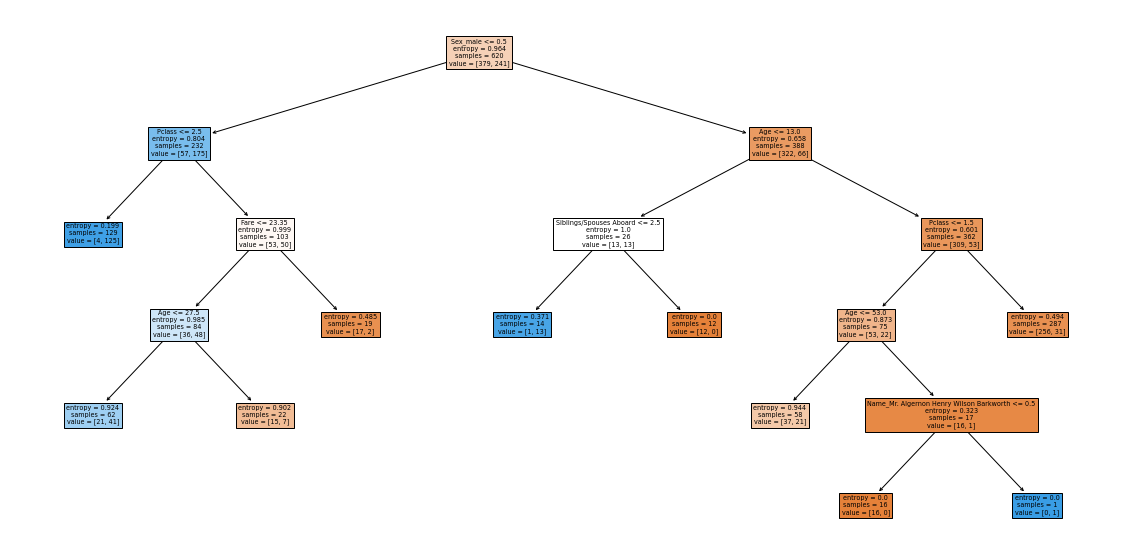

In [20]:
plt.figure(figsize=(20,10))
plot_tree(clf_max_leaf, filled=True, feature_names=X.columns)
plt.show()

In [21]:
performance_df = pd.DataFrame(performance_results)

In [22]:
print(performance_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  Categorical Decision Tree  0.805243   0.835616  0.603960  0.701149
1              Max Depth = 5  0.805243   0.788235  0.663366  0.720430
2      Min Samples Leaf = 10  0.790262   0.835821  0.554455  0.666667
3     Min Samples Split = 20  0.794007   0.819444  0.584158  0.682081
4        Max Leaf Nodes = 10  0.794007   0.828571  0.574257  0.678363


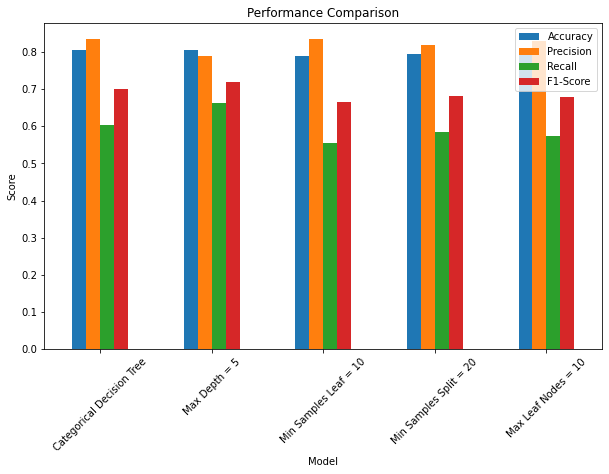

In [23]:
performance_df.plot(x='Model', kind='bar', figsize=(10,6), title='Performance Comparison')
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()